# Variables catégoricas

In [1]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("datasets/ecom-expense/Ecom Expense.csv")

In [3]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city = pd.get_dummies(df["City Tier"], prefix = "City")

In [5]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [6]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [7]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
column_names
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [8]:
df_new = df_new[column_names].join(dummy_city)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [9]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", 
                "Gender_Female", "City_Tier 1", "City_Tier 2", 
                "City_Tier 3", "Record"]

In [10]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [11]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030137362
[ 1.47538980e-01  1.54946125e-01  1.31025013e+02 -1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [13]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.1475389804920574),
 ('Transaction Time', 0.1549461254958966),
 ('Gender_Male', 131.0250132555463),
 ('Gender_Female', -131.02501325554664),
 ('City_Tier 1', 76.7643260104954),
 ('City_Tier 2', 55.13897430923246),
 ('City_Tier 3', -131.90330031972783),
 ('Record', 772.2334457445646)]

In [14]:
lm.score(X,Y)

0.9179923586131016

El modelo puede ser escrito como : 
    Total_spend = -335.73800174538064 + 0.14744226897448573*Monthly Income + 0.15639158306366507 * Transaction Time + 133.0887066317042*Gender_Male + -133.08870663170424*Gender_Female + 78.37850497640358*City_Tier 1 + 52.02596334431919*City_Tier 2 + -130.40446832072288*City_Tier 3 + 772.1492053631347*Record


In [15]:
df_new["prediction"] = lm.predict(pd.DataFrame(df_new[feature_cols]))

In [16]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [17]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)

In [18]:
SSD

1517733985.3408165

In [19]:
RSE = np.sqrt(SSD/(len(df_new)- len(feature_cols)-1))

In [20]:
RSE

803.1318809818166

In [21]:
sales_mean = np.mean(df_new["Total Spend"])

In [22]:
sales_mean

6163.176415976714

In [23]:
error = RSE / sales_mean

In [24]:
print("ERROR DEl:",error*100,"%") 

ERROR DEl: 13.031135680294161 %


## Eliminar Variables dummy redundantes

In [25]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [26]:
dummy_city = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [27]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0


In [28]:
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [29]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lm.intercept_

-133.67781754642238

In [31]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589748),
 ('Gender_Male', 262.05002651109413),
 ('City_Tier 2', -21.625351701262595),
 ('City_Tier 3', -208.66762633022336),
 ('Record', 772.2334457445638)]

In [32]:
lm.score(X,Y)

0.9179923586131016

## Transormaciones de variables para conseguir una relación no lineal

In [33]:
data_auto = pd.read_csv("datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


Text(0.5, 1.0, 'CV vs MPG')

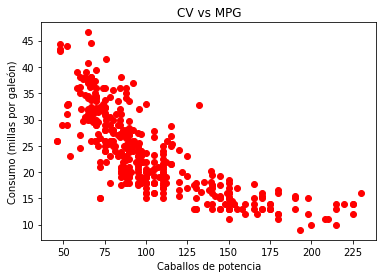

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"],"ro")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

## Modelo de regresión lineal
#### MP = alpha + breta*horsepower 

In [35]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X = X[:, np.newaxis]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

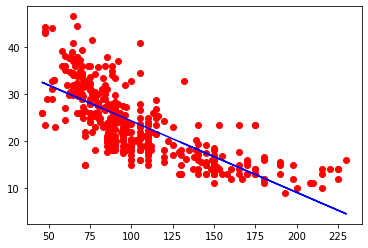

In [36]:
%matplotlib inline 
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X), color="blue")

In [37]:
lm.score(X,Y)

0.574653340645025

In [38]:
SSD = np.sum((Y - lm.predict(X))**2)
SSD

10315.75196006092

In [39]:
RSE = np.sqrt(SSD/(len(X) - 1))
RSE

5.046879480825511

In [40]:
error = RSE / np.mean(data_auto["mpg"])
error

0.21462773361633464

### Modelo de regresión cuadratico
mpg= a + b*horsepower**2

In [41]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
X = X**2
X = X[:,np.newaxis]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
lm.score(X,Y)

0.4849887034823205

In [43]:
SSD = np.sum((Y - lm.predict(X))**2)
SSD

12490.350340501926

In [44]:
RSE = np.sqrt(SSD/(len(X) - 1))
RSE

5.553410772769817

In [45]:
error = RSE / np.mean(data_auto["mpg"])

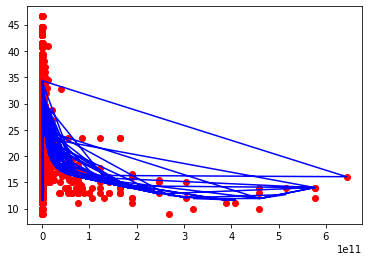

In [94]:
%matplotlib inline 
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X), color="blue")

### Modelo linealñ-cuadratico
mpg = a + b*horsepower + c*horsepower**2

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [47]:
poly = PolynomialFeatures(degree = 2)
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
X = poly.fit_transform(X[:,np.newaxis])
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
lm = linear_model.LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
lm.score(X,Y)

0.6439066584257469

In [91]:
lm.intercept_, lm.coef_

(34.98937740782607, array([-0.05945901]))

mpg = 55.02619244708117 -0.43404318*HP + 0.00112615 * HP**2

In [92]:
for d in range(2,6): 
    poly = PolynomialFeatures(degree = d)
    X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
    X = poly.fit_transform(X[:,np.newaxis])
    Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
    lm = linear_model.LinearRegression()
    lm.fit(X,Y)
    print(lm.score(X,Y))
    regression_validation(X, Y, lm.predict(X))

0.6439066584257469
SSD: 8636.180643524502, RSE: 4.61778115803654, Promedio: 23.51457286432162, ERROR:19.63795466190689%
0.6444678885560744
SSD: 8622.56936742855, RSE: 4.614140736300908, Promedio: 23.51457286432162, ERROR:19.622473106036676%
0.6467674189704501
SSD: 8566.799832491355, RSE: 4.5991947315797574, Promedio: 23.51457286432162, ERROR:19.55891250126878%
0.6547512491379645
SSD: 8373.171388755074, RSE: 4.546921734116981, Promedio: 23.51457286432162, ERROR:19.33661206755735%


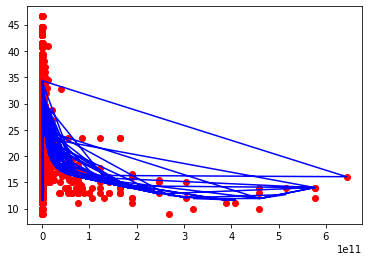

In [93]:
%matplotlib inline 
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X), color="blue")

In [90]:
def regression_validation(X, Y, y_pred): 
    SSD = np.sum((Y - y_pred)**2)
    RSE = np.sqrt(SSD/(len(X) - 1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+str(SSD)+", RSE: "+str(RSE)+", Promedio: "+str(y_mean)+", ERROR:"+str(error*100)+"%")

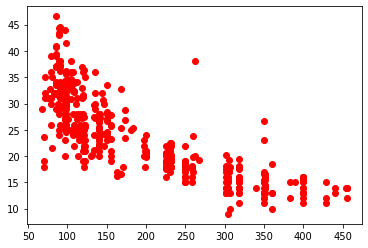

In [56]:
plt.plot(data_auto["displacement"], data_auto["mpg"],"ro")

### El problema de los outliers

In [59]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
lm = LinearRegression()

In [60]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
lm.score(X,Y)

0.6261049762826918

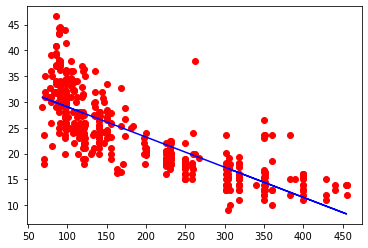

In [64]:
%matplotlib inline 
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X), color="blue")

In [70]:
data_auto[(data_auto["displacement"]>250) & (data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [74]:
data_auto[(data_auto["displacement"]>300) & (data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [78]:
data_auto_clean= data_auto.drop([395,258,305,372])

In [84]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:,np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())
lm = LinearRegression()

In [85]:
lm.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
lm.score(X,Y)

0.6466514317531822

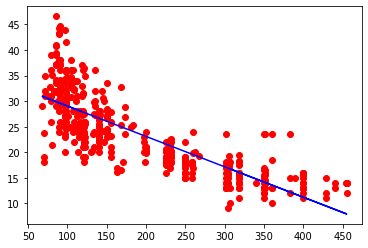

In [88]:
%matplotlib inline 
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X), color="blue")